<a href="https://colab.research.google.com/github/wandieinnocents/feedback_text_analysis_nlp_python/blob/main/EvaluationMetrics_CommentsTextAnalysis_wandie_FinalV4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>MASTER OF SCIENCE IN COMPUTER SCIENCE</center></h1>
<p><center>DATA ANALYTICS & VIZUALIZATION , SEMESTER 2 | EXAM </center></p>
<p><center><strong> NAME  : WENAREEBA INNOCENT | REG-NO: 2021/HD05/2315U | STUDENT NO : 2100702315</strong></center></p>




---



**INSTRUCTIONS** 

Dataset Source :  *https://www.fams-cit.com/fscomments* to perform the
following text analysis tasks of the dataset


---



1.   Create a corpus from the downloaded comments from Field Supervisors.
2.   Cluster the comments of Field Supervisors about Interns into categories: Excellent, Good, Neutral, Poor, Very Poor.

3.   Assess the performance of your clustering algorithm above.
4.   Create a Named Entity Recognition (NER) model that takes in a comment as an input and outputs the Entities, if any, belonging
to the categories: Person, Organization, Place/Location, Time
5.   Create a visualization to show insights about the dataset. (Create the visualization using D3 and host it at the same server you
have used in the previous assignments)




**Data preprocessing**

**Data cleaning** , this involves removing punctuations and symbols from the dataset

**Tokenization**, breaking down of sentenses into words
stop words , words without meaning in the dataset

**lemmanization** , reducing a word to its root form, it resolves words to dictionary form.

**stemming** , this is reducing words to their word stems ie males to male , playing to play, the algorithm will be able to detect the meaning of the words

IMPORT THE LIBRARIES TO USE WHILE WORKING ON THE COMMENTS TEXT ANALYSIS

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
# matplotlib
import matplotlib.pyplot as plt
import gensim
import matplotlib.colors as mcolors
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
# word cloud
from wordcloud import WordCloud, STOPWORDS
import datetime
import time
# natural language processing
import nltk  
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Working with corpus and stop words
from nltk.corpus import stopwords
# import wordnet from nltk.corpus
from nltk.corpus import wordnet
from nltk import pos_tag
# import lemannatizer library
from nltk.stem import WordNetLemmatizer 
import string

  

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**CLONING THE GITHUB REPOSITORY**

I converted the dataset(Comments.xlsx) to csv for readability purposes, and uploaded the dataset to my github repository so i can be able to pick up the dataset from there with ease

In [2]:
!git clone https://github.com/wandieinnocents/feedback_text_analysis_nlp_python.git

Cloning into 'feedback_text_analysis_nlp_python'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


**LOADING THE DATASET**

Load dataset from the github repository in the CommentsCsv.csv File

In [3]:
# Load dataset from the github repository in
dataFrame=pd.read_csv('/content/feedback_text_analysis_nlp_python/CommentsCsv.csv', sep=",", encoding='ISO-8859-1')

After loading dataset , Incase there are null fields, fill them with 'na'

In [4]:
#fill fields which are null with 'na'
dataFrame=dataFrame.fillna('There is no data available') 

Display the dataset after the running fillna (to avoid erros incase there are null fields)

In [5]:
# Display the dataset
dataFrame.head(15)

,comment_id,Comment
0,5,djfjkdfjkjkffdk edited
1,41,Faith has exhibited enthusiasm in taking on th...
2,49,He now has now understood the structure of gra...
3,50,The Intern was oriented on ICT setup and Infra...
4,52,The student was oriented on the organization s...
5,53,Activities well completed
6,54,finished on time
7,55,The student's weekly progress was justifiably ...
8,56,Noted
9,57,She found this very interesting as she was abl...


Shape of the dataset

In [6]:
print ('Display all Comments in Dataset')
print('RowsxColumns :' , dataFrame.shape)

Display all Comments in Dataset
RowsxColumns : (4920, 2)


In [7]:
dataFrame.count()

comment_id    4920
Comment       4920
dtype: int64

Pick a comment from dataset to handle  data cleaning which later will be converted to the entire dataset

In [8]:
# Pick the second row of dataset 
pick_single_comment_for_testing = dataFrame.loc[3,:].copy()
print(pick_single_comment_for_testing.Comment)

The Intern was oriented on ICT setup and Infrastructure of Soroti University, drafted workplan and started off the Internship. Simon was encouraged to take the Internship seriously as there was a lot to learn.


**Convert the String to Lower case** 

If the original case of the character is already lowercase then the it will retain its lower case. we convert to lower case so the algorithm can easily work with the string data when it is uniform, and its easily interpreted

In [9]:
#convert upper case to lower case and still search accurately
def process_string(text):
    text = text.lower()#make the text lowercase
    text = text.translate(str.maketrans('','',string.punctuation)) #strip punctuation
    return text


Display string converted to lower case

In [10]:
# converted string to lower case
process_string(pick_single_comment_for_testing.Comment)

'the intern was oriented on ict setup and infrastructure of soroti university drafted workplan and started off the internship simon was encouraged to take the internship seriously as there was a lot to learn'

**PARTS OF SPEECH TAGGIN** 

POS Tagging (Parts of Speech Tagging) is a process to mark up the words in text format for a particular part of a speech based on its definition and context. It is responsible for text reading in a language and assigning some specific token (Parts of Speech) to each word. It is also called grammatical tagging.

In [11]:
def get_wordnet_pos(word):
    # """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,"N": wordnet.NOUN,"V": wordnet.VERB,"R": wordnet.ADV  }
    return tag_dict.get(tag, wordnet.NOUN)

Display the Parts of speech tags on some words

In [12]:
print("intern:{}\n oriented:{}\n at:{}".format(get_wordnet_pos("windows"),get_wordnet_pos("run"), get_wordnet_pos("happy")))

intern:n
 oriented:v
 at:a


In [13]:
stop = stopwords.words("english")


**LEMMATIZATION** 

Lemmatization is the grouping together of different forms of the same word. In search queries, lemmatization allows end users to query any version of a base word and get relevant results. Because search engine algorithms use lemmatization, the user is free to query any inflectional form of a word and get relevant results. For example, if the user queries the plural form of a word (investments), the search engine knows to also return relevant content that uses the singular form of the same word (investment).



In [14]:
# lemmatization 
lem = WordNetLemmatizer()

def stop_lemmatize(doc):
    tokens = nltk.word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in stop:
            tmp += lem.lemmatize(w, get_wordnet_pos(w)) + " "
    return tmp

String before lemmatization

In [15]:
# String before lemmatization
pick_single_comment_for_testing.Comment

'The Intern was oriented on ICT setup and Infrastructure of Soroti University, drafted workplan and started off the Internship. Simon was encouraged to take the Internship seriously as there was a lot to learn.'

String After lemmatization

In [16]:
# Lemmatize the string
stop_lemmatize(doc = pick_single_comment_for_testing.Comment) 

'The Intern orient ICT setup Infrastructure Soroti University , draft workplan start Internship . Simon encourage take Internship seriously lot learn . '

In [17]:
dataFrame_processed = dataFrame.copy()

In [18]:
%time process_string(pick_single_comment_for_testing.Comment)

CPU times: user 114 µs, sys: 16 µs, total: 130 µs
Wall time: 136 µs


'the intern was oriented on ict setup and infrastructure of soroti university drafted workplan and started off the internship simon was encouraged to take the internship seriously as there was a lot to learn'

In [19]:
#Transform the dataframe to enable the processing of column contents 
# as strings which are arrays of uncoded characters
def transform_dataFrame(dataFrame):
    dataFrame['Comment'] = dataFrame['Comment'].apply(process_string)
 

In [20]:
%time transform_dataFrame(dataFrame_processed)

CPU times: user 29.4 ms, sys: 855 µs, total: 30.2 ms
Wall time: 33.4 ms


In [21]:
dataFrame_processed.head() #checking out the data

,comment_id,Comment
0,5,djfjkdfjkjkffdk edited
1,41,faith has exhibited enthusiasm in taking on th...
2,49,he now has now understood the structure of gra...
3,50,the intern was oriented on ict setup and infra...
4,52,the student was oriented on the organization s...


In [22]:
#Let's see the content of the index we are building
pick_single_comment_for_testing = dataFrame_processed.loc[1,:].copy()
print(pick_single_comment_for_testing)
Comment = pick_single_comment_for_testing.Comment
index_test = {}

comment_id                                                   41
Comment       faith has exhibited enthusiasm in taking on th...
Name: 1, dtype: object


In [23]:
# Here we want the words in the index to be searched and retrieved as single words not
# as a sentence for accurate search
words = pick_single_comment_for_testing.Comment.split()
text = pick_single_comment_for_testing.Comment
word = words[5]
sample = {word:[text]}
print(sample)

{'taking': ['faith has exhibited enthusiasm in taking on the project at hand she has already shown promising signs in understanding the core concepts of software engineering i look forward discovering more as time goes on']}


In [24]:
for word in words:                       #for loop to help us avoid attaching a text to an existing word.
    if word in index_test.keys():
        if text not in index_test[word]:
            index_test[word].append(text)
    else:
        index_test[word] = [text]

In [25]:
print(index_test)

{'faith': ['faith has exhibited enthusiasm in taking on the project at hand she has already shown promising signs in understanding the core concepts of software engineering i look forward discovering more as time goes on'], 'has': ['faith has exhibited enthusiasm in taking on the project at hand she has already shown promising signs in understanding the core concepts of software engineering i look forward discovering more as time goes on'], 'exhibited': ['faith has exhibited enthusiasm in taking on the project at hand she has already shown promising signs in understanding the core concepts of software engineering i look forward discovering more as time goes on'], 'enthusiasm': ['faith has exhibited enthusiasm in taking on the project at hand she has already shown promising signs in understanding the core concepts of software engineering i look forward discovering more as time goes on'], 'in': ['faith has exhibited enthusiasm in taking on the project at hand she has already shown promis

In [26]:
data_text = dataFrame[['Comment']]
data_text['index'] = data_text.index
documents = data_text
print(documents)

                                                Comment  index
0                                djfjkdfjkjkffdk edited      0
1     Faith has exhibited enthusiasm in taking on th...      1
2     He now has now understood the structure of gra...      2
3     The Intern was oriented on ICT setup and Infra...      3
4     The student was oriented on the organization s...      4
...                                                 ...    ...
4915                     Good listener and fast learner   4915
4916                     Fast learner and good listener   4916
4917  Needs more support to accomplish the pending t...   4917
4918         Positive attitude towards work. Keep it up   4918
4919  The the intern is more committed to accomplish...   4919

[4920 rows x 2 columns]


In [27]:
def lemmatize_stemming(text):
    stemmer = nltk.stem.porter.PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [28]:
document_num = 1000  ##randomly pick one comment
doc_sample = documents[documents['index'] == 3].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['The', 'Intern', 'was', 'oriented', 'on', 'ICT', 'setup', 'and', 'Infrastructure', 'of', 'Soroti', 'University,', 'drafted', 'workplan', 'and', 'started', 'off', 'the', 'Internship.', 'Simon', 'was', 'encouraged', 'to', 'take', 'the', 'Internship', 'seriously', 'as', 'there', 'was', 'a', 'lot', 'to', 'learn.']


 tokenized and lemmatized document: 
['intern', 'orient', 'setup', 'infrastructur', 'soroti', 'univers', 'draft', 'workplan', 'start', 'internship', 'simon', 'encourag', 'internship', 'serious', 'learn']


In [29]:
processed_docs = documents['Comment'].map(preprocess)
processed_docs[:10]

0                              [djfjkdfjkjkffdk, edit]
1    [faith, exhibit, enthusiasm, take, project, ha...
2    [understand, structur, grail, differ, compon, ...
3    [intern, orient, setup, infrastructur, soroti,...
4    [student, orient, organ, structur, develop, wo...
5                                     [activ, complet]
6                                       [finish, time]
7    [student, weekli, progress, justifi, good, cha...
8                                               [note]
9    [interest, abl, identifi, know, problem, assoc...
Name: Comment, dtype: object

DO SOME TEXT SENTIMENTS ON OUR DATASET

We first print existing processed documents to do sentiments on

In [30]:
# Processed documents 
processed_docs

0                                 [djfjkdfjkjkffdk, edit]
1       [faith, exhibit, enthusiasm, take, project, ha...
2       [understand, structur, grail, differ, compon, ...
3       [intern, orient, setup, infrastructur, soroti,...
4       [student, orient, organ, structur, develop, wo...
                              ...                        
4915                        [good, listen, fast, learner]
4916                        [fast, learner, good, listen]
4917              [need, support, accomplish, pend, task]
4918                               [posit, attitud, work]
4919                   [intern, commit, accomplish, task]
Name: Comment, Length: 4920, dtype: object

Tranforming the comments to corpus

In [31]:
processed_docs = []
for sentence in dataFrame["Comment"]:
     tokens = [word for word in sentence.split()]
     processed_docs.append(tokens)
    

In [32]:
##create dictionary based on the preprocessed_documents
dictionary = gensim.corpora.Dictionary(processed_docs)

##check the dictionary
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 djfjkdfjkjkffdk
1 edited
2 Faith
3 I
4 She
5 already
6 as
7 at
8 concepts
9 core
10 discovering


In [33]:
## remove extreme words (very common and very rare)
dictionary.filter_extremes(no_below=15, no_above=0.1)

##create bag-of-word model for each documents
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [34]:
## check the bow_corpus
bow_doc_1000 = bow_corpus[document_num]

for i in range(len(bow_doc_1000)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_1000[i][0], 
                                                     dictionary[bow_doc_1000[i][0]], 
                                                     bow_doc_1000[i][1]))

Word 96 ("can") appears 1 time.
Word 129 ("knowledge") appears 1 time.
Word 264 ("PHP,") appears 1 time.
Word 330 ("payment") appears 1 time.
Word 466 ("making") appears 1 time.
Word 493 ("enable") appears 1 time.
Word 572 ("customers") appears 1 time.
Word 617 ("integration") appears 1 time.


In [35]:
now = datetime.datetime.now()
print ("start model building at ",now.strftime("%Y-%m-%d %H:%M:%S"))


lda_model = gensim.models.LdaMulticore(bow_corpus, # Stream of document vectors or sparse matrix of shape 
                                       num_topics=5, # The number of requested latent topics to be extracted from the training corpus.
                                       id2word = dictionary, #Mapping from word IDs to words. It is used to determine the vocabulary size. 
                                       passes = 50, #Number of passes through the corpus during training.
                                       workers=10) #Number of workers processes to be used for parallelization.


now = datetime.datetime.now()
print ('Model training finished at ',now.strftime("%Y-%m-%d %H:%M:%S"))

start model building at  2022-09-16 13:10:55
Model training finished at  2022-09-16 13:12:43


In [36]:
##print out the key words of five topics
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.039*"can" + 0.036*"up" + 0.034*"you" + 0.021*"also" + 0.020*"it" + 0.016*"your" + 0.015*"that" + 0.014*"set" + 0.013*"now" + 0.011*"server"


Topic: 1 
Words: 0.024*"good" + 0.022*"she" + 0.022*"very" + 0.020*"her" + 0.018*"well" + 0.017*"She" + 0.012*"learn" + 0.012*"coding" + 0.012*"time" + 0.012*"as"


Topic: 2 
Words: 0.055*"skills" + 0.035*"internship." + 0.031*"end" + 0.030*"new" + 0.030*"all" + 0.029*"report" + 0.029*"Progressive" + 0.027*"supposed" + 0.025*"detail" + 0.025*"acquired."


Topic: 3 
Words: 0.037*"encourage" + 0.035*"any" + 0.026*"completed" + 0.024*"week's" + 0.023*"challenges." + 0.021*"tasks" + 0.020*"at" + 0.019*"without" + 0.019*"doing" + 0.017*"Stratcom"


Topic: 4 
Words: 0.018*"tasks" + 0.017*"that" + 0.017*"The" + 0.017*"his" + 0.013*"as" + 0.013*"work" + 0.012*"completed" + 0.012*"been" + 0.012*"by" + 0.012*"data"




In [37]:
# documents_lda_topics = pd.DataFrame(columns = ["topic1", "topic2", "topic3", "topic4", "topic5"])
# for i in range(len(bow_corpus)):
#     if i % 50 ==0:
#         print(i)
#     documents_lda_topics.loc[i] = [0] * 5

#     output = lda_model.get_document_topics(bow_corpus[i])
#     for j in range(len(output)):
#         a = output[j][0]
#         b = output[j][1]
#         documents_lda_topics.iloc[i,a] = b

# print("Data processing finished")


# 

documents_lda_topics = pd.DataFrame(columns = ["Excellent", "Good", "Neutral", "Poor", "Very Poor"])
for i in range(len(bow_corpus)):
    if i % 50 ==0:
        print(i)
    documents_lda_topics.loc[i] = [0] * 5

    output = lda_model.get_document_topics(bow_corpus[i])
    for j in range(len(output)):
        a = output[j][0]
        b = output[j][1]
        documents_lda_topics.iloc[i,a] = b

#print("Data processing finished")

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900


In [38]:
## pick the final topic for each abstract based on max-probability
for i in range(5):
    documents_lda_topics.iloc[:, i] = documents_lda_topics.iloc[:, i].astype('float64', copy=False)
    
documents_lda_topics["final_topic"] =documents_lda_topics.iloc[:, :10].idxmax(axis=1)


In [39]:
##preview the dataframe for both models
print("LDA + bow_corpus: topic probability:")
documents_lda_topics.head(20)

LDA + bow_corpus: topic probability:


,Excellent,Good,Neutral,Poor,Very Poor,final_topic
0,0.200000,0.200000,0.200000,0.200000,0.200000,Excellent
1,0.011987,0.291966,0.011820,0.011864,0.672365,Very Poor
2,0.910227,0.022439,0.022225,0.022272,0.022837,Excellent
3,0.017178,0.373567,0.105533,0.100812,0.402911,Very Poor
4,0.221683,0.189673,0.230954,0.017058,0.340631,Very Poor
5,0.067030,0.070606,0.066768,0.727777,0.067818,Poor
6,0.066787,0.397325,0.399983,0.067629,0.068276,Neutral
7,0.367163,0.034275,0.034410,0.033793,0.530358,Very Poor
8,0.200000,0.200000,0.200000,0.200000,0.200000,Excellent
9,0.020421,0.677015,0.020160,0.020160,0.262245,Good


In [40]:
# export the topics to csv
topics_to_csv = dataFrame.join(documents_lda_topics)
topics_to_csv.to_csv('topics_to-csv.csv')
topics_to_csv

,comment_id,Comment,Excellent,Good,Neutral,Poor,Very Poor,final_topic
0,5,djfjkdfjkjkffdk edited,0.200000,0.200000,0.200000,0.200000,0.200000,Excellent
1,41,Faith has exhibited enthusiasm in taking on th...,0.011987,0.291966,0.011820,0.011864,0.672365,Very Poor
2,49,He now has now understood the structure of gra...,0.910227,0.022439,0.022225,0.022272,0.022837,Excellent
3,50,The Intern was oriented on ICT setup and Infra...,0.017178,0.373567,0.105533,0.100812,0.402911,Very Poor
4,52,The student was oriented on the organization s...,0.221683,0.189673,0.230954,0.017058,0.340631,Very Poor
...,...,...,...,...,...,...,...,...
4915,8150,Good listener and fast learner,0.050517,0.519357,0.050977,0.328582,0.050566,Good
4916,8151,Fast learner and good listener,0.066780,0.732258,0.066667,0.067392,0.066903,Good
4917,8160,Needs more support to accomplish the pending t...,0.040688,0.040331,0.040276,0.040332,0.838373,Very Poor
4918,8161,Positive attitude towards work. Keep it up,0.884049,0.028734,0.028582,0.028584,0.030052,Excellent


In [41]:
def get_wordcloud(topic):

  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

  cloud = WordCloud(stopwords=STOPWORDS,
                    background_color='black',
                    width=2500,
                    height=1800,
                    max_words=10,
                    colormap='tab10',
                    color_func=lambda *args, **kwargs: cols[i],
                    prefer_horizontal=1.0)

  topics = topic.show_topics(formatted=False)

  fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

  for i, ax in enumerate(axes.flatten()):
      fig.add_subplot(ax)
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
      plt.gca().axis('off')


  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis('off')
  plt.margins(x=0, y=0)
  plt.tight_layout()
  plt.show()

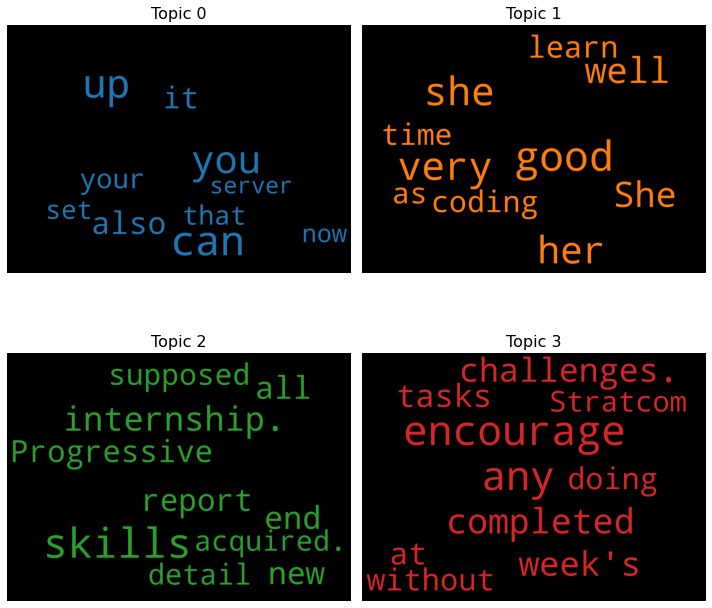

In [42]:
get_wordcloud(topic= lda_model)

**Word Counts of Topic Keywords**


I also obtained the weights which are useful in to measure the frequency of the words as regards to their appearance in the document  , and it is summerized per topic .I plotted the word counts and the weights with each having a keywork in the chart and corresponding weights . 

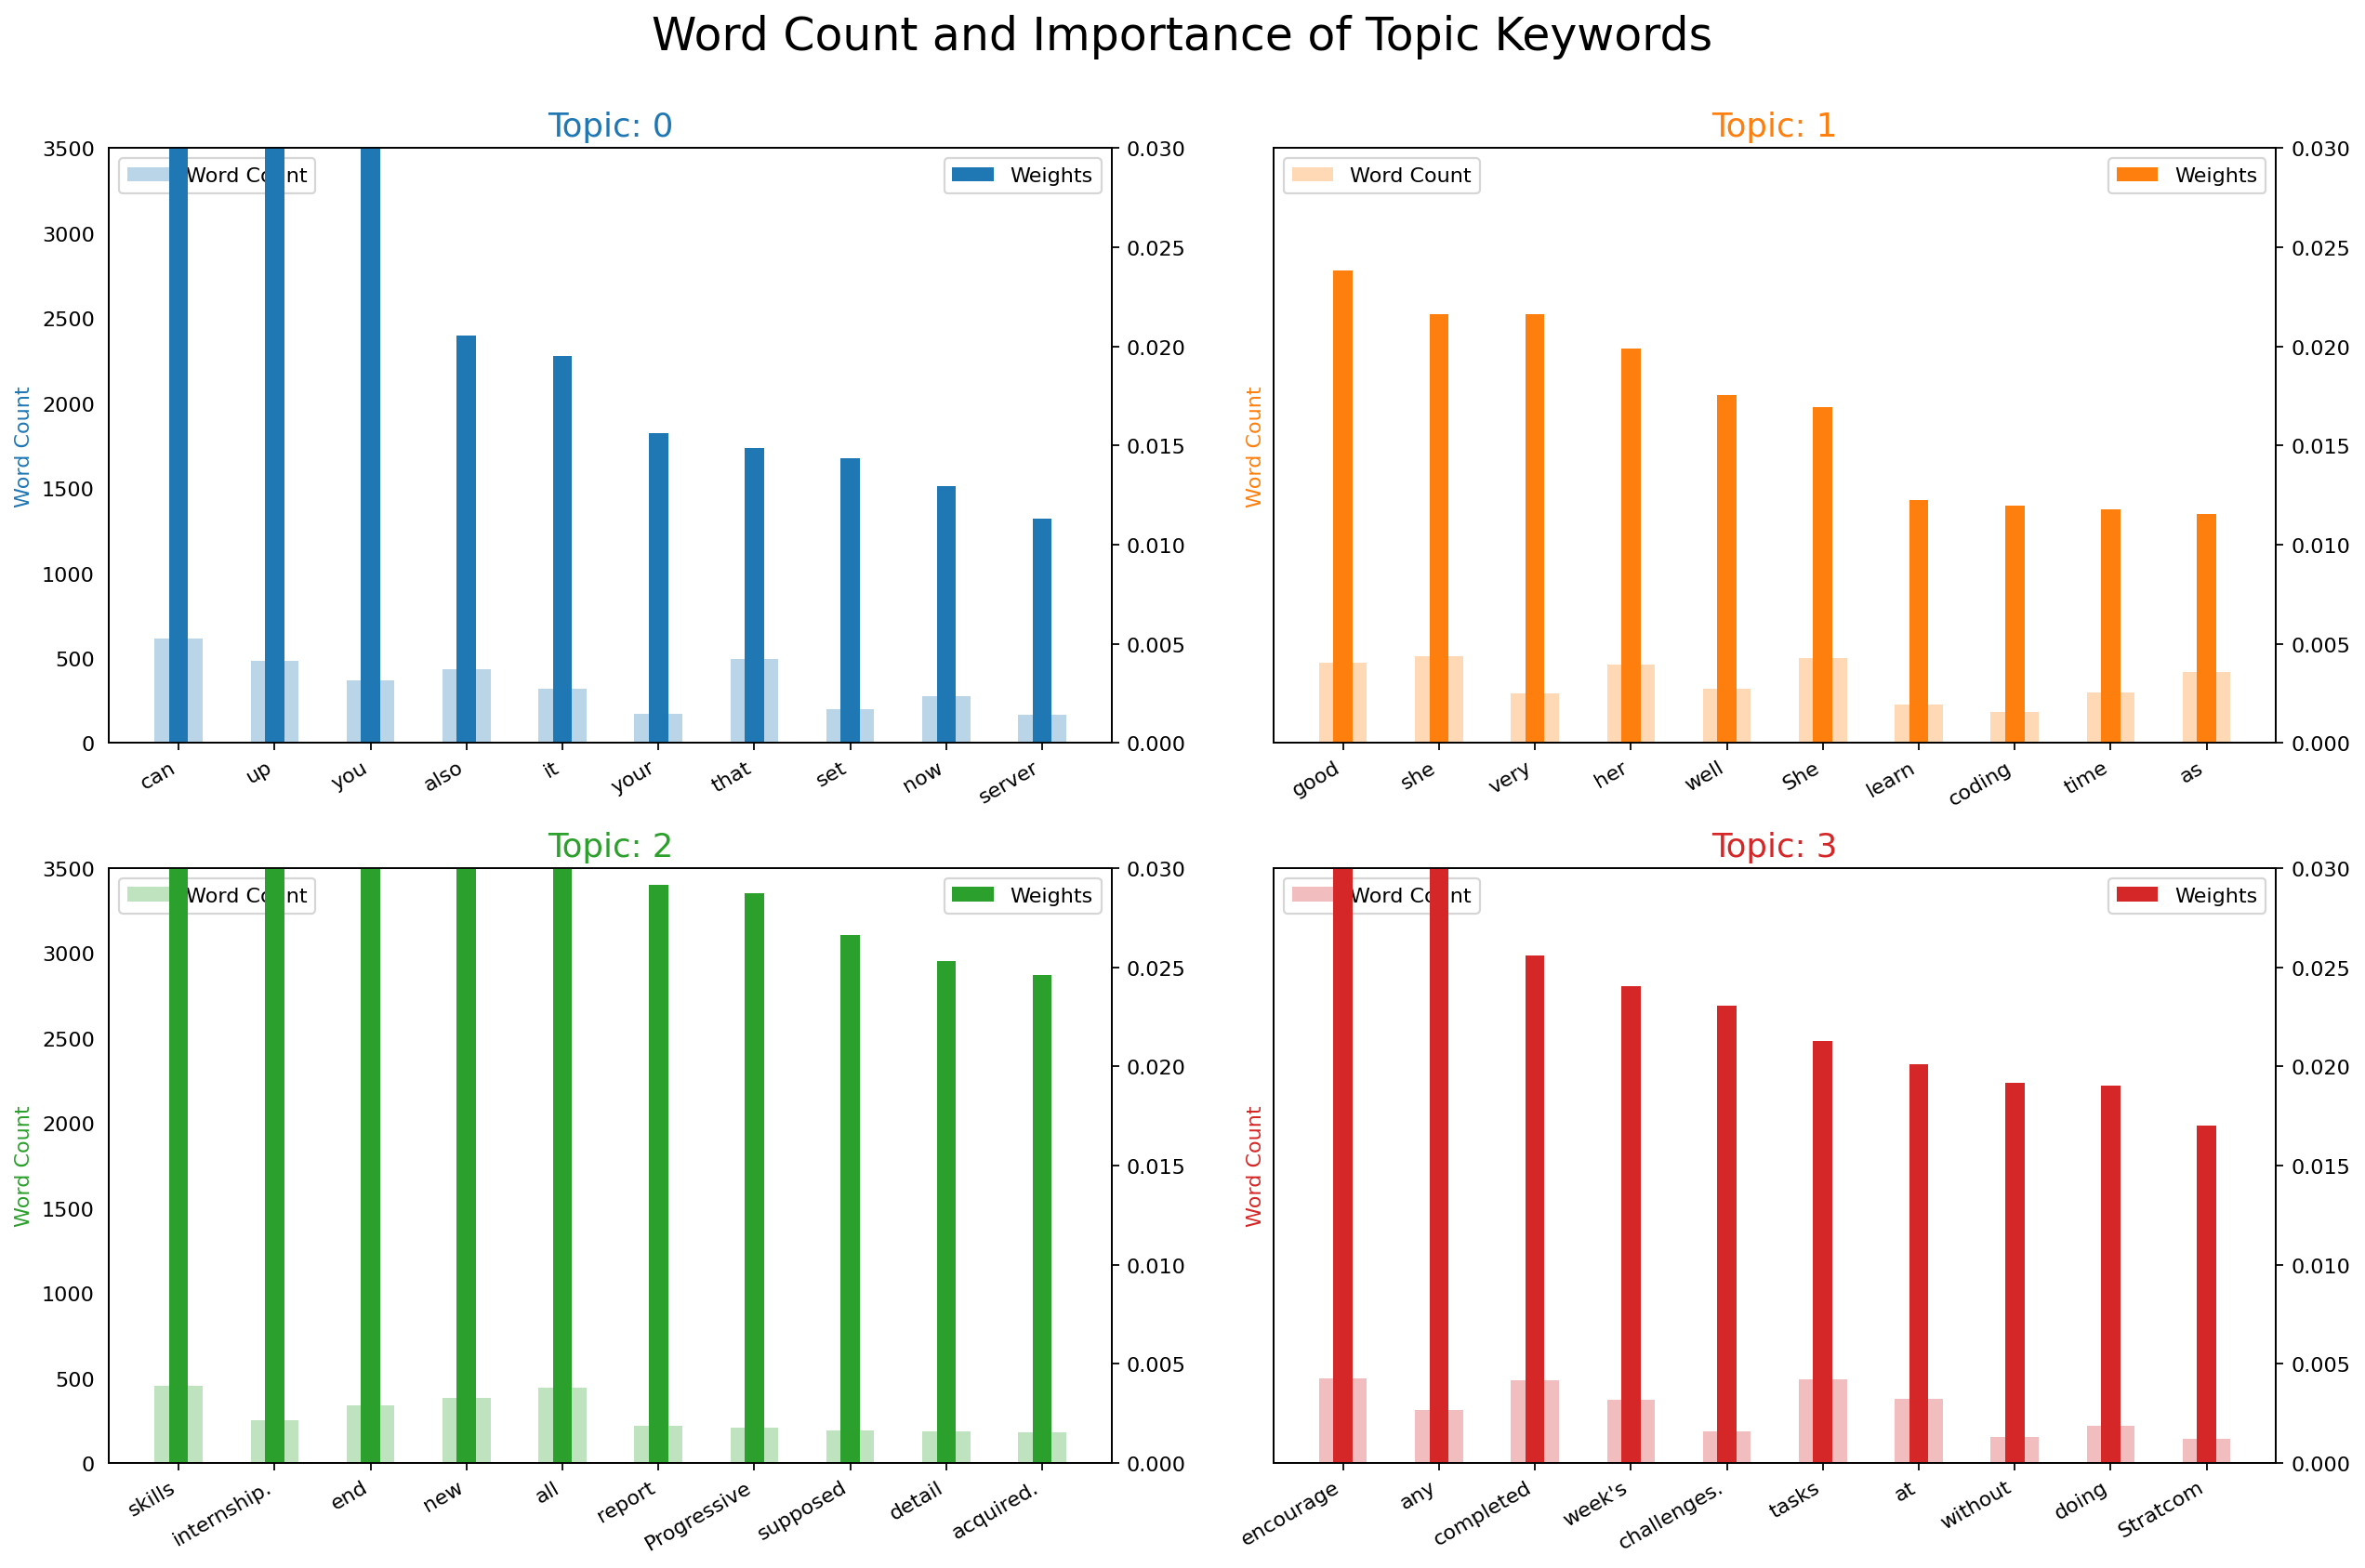

In [43]:

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in processed_docs for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

**Vizualize the topics key_words**

I used pyLDAvis package to handle the interactive charting in my notebook. Since i have build the LDA model , the next part is to do the examination of the topics that have been produced and the key words associated. In this topics vizualization , each buble on the left side is to represent a topic , and the larger the buble , the more prevalent the topic. When a curseor is moved on the buble on the left side of the vizualization , the right hand side will display the salient keywords that are in that topic that has been selected on the specific buble , and this is the topic modeling for the model . 

In [44]:
# Vizualize the topics keywords
!pip install pyLDAvis
import pyLDAvis.gensim_models 
import pickle 
import pyLDAvis# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
LDAvis_prepared

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=877ed3d1c9eef01327c2bf122d9afb1f79feff02eaaebe2c6a09bc7e0ceb7770
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=ffead923457ab0112450f8ff2c770a840685df257e66d7e28e1f999c90b24dff
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.111477  0.052219       1        1  30.474373
1      0.041494  0.076585       2        1  20.307440
0      0.120224  0.157858       3        1  20.177971
3      0.091773 -0.290318       4        1  15.228277
2     -0.364968  0.003655       5        1  13.811938, topic_info=            Term        Freq       Total Category  logprob  loglift
38        skills  459.000000  459.000000  Default  30.0000  30.0000
449          you  361.000000  361.000000  Default  29.0000  29.0000
298  internship.  257.000000  257.000000  Default  28.0000  28.0000
382          any  314.000000  314.000000  Default  27.0000  27.0000
84            up  475.000000  475.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
34      acquired   59.201339   90.811711   Topic5  -4.8207   1.5518
121          him  123.791382  405.306880   Topic5  -4.0831   0.7936
368          are  100.803481  288.366834   Topic5  -4.2885   0.9286
335      managed   94.571935  333.541852   Topic5  -4.3523   0.7192
54           she   90.093083  504.202967   Topic5  -4.4008   0.2575

[333 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
845       5  0.942762  -Started
831       5  0.963616   -Worked
548       1  0.894706         .
548       3  0.092556         .
513       1  0.983742         2
...     ...       ...       ...
145       4  0.370985   working
620       3  0.379384     write
620       5  0.617303     write
449       3  0.997347       you
338       3  0.992464      your

[532 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 4, 3])

In [45]:
# coherence 
from gensim.models import CoherenceModel# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4602436656468162


In [46]:
import functools
from IPython.core.display import display, HTML
from nltk import PorterStemmer

#tell the system how many sentences are needed
max_sentences=10

# function to stem keywords into a common base word
def stem_words(words):
    stemmer = PorterStemmer()
    singles=[]
    for w in words:
        singles.append(stemmer.stem(w))
    return singles

# list of lists for topic words related to this tasks
display(HTML('<h1>Clustered comments of Field Supervisors about Interns into categories: Excellent, Good, Neutral, Poor, Very Poor.</h1>'))
tasks = [["excellent"], ["good"],["neutral"],['poor'],["very poor"]]


# loop through the list of lists
for search_words in tasks:
    #str1=''
    # a string of the search words to print readable search
    str1=' '.join(search_words)
    search_words=stem_words(search_words)
    # add excellent to focus the search for comments and avoid unrelated comments
    search_words.append("excellent")
    # search the dataframe for all the keywords
    dataFrame1=dataFrame[functools.reduce(lambda a, b: a&b, (dataFrame['Comment'].str.contains(s) for s in search_words))]
    search_words.pop()

    search_words.append("good")
    # search the dataframe for all the keywords
    dataFrame3=dataFrame[functools.reduce(lambda a, b: a&b, (dataFrame['Comment'].str.contains(s) for s in search_words))]
    search_words.pop()

    search_words.append("poor")
    # search the dataframe for all the keywords
    dataFrame4=dataFrame[functools.reduce(lambda a, b: a&b, (dataFrame['Comment'].str.contains(s) for s in search_words))]
    search_words.pop()

    search_words.append("very poor")
    # search the dataframe for all the keywords
    dataFrame5=dataFrame[functools.reduce(lambda a, b: a&b, (dataFrame['Comment'].str.contains(s) for s in search_words))]
    search_words.pop()

    search_words.append("neutral")
    dataFrame2=dataFrame[functools.reduce(lambda a, b: a&b, (dataFrame['Comment'].str.contains(s) for s in search_words))]
    # remove the neutral word for sentence level analysis
    search_words.pop()
    #combine frames with excellent, good, neutral, poor, and very poor and drop duplicates
    frames = [dataFrame1, dataFrame2, dataFrame3, dataFrame4, dataFrame5]
    dataFrame1a = pd.concat(frames)
    dataFrame=dataFrame.drop_duplicates()
    
    display(HTML('<h3>Task Topic: '+str1+'</h3>'))
    # record how many sentences have been saved for display
    sentences_used=0
    # loop through the result of the dataframe search
    for index, row in dataFrame1a.iterrows():
        #break apart the comment to sentence level
        sentences = row['Comment'].split('. ')
        #loop through the sentences of the comment
        for sentence in sentences:
            # missing lets the system know if all the words are in the sentence
            missing=0
            #loop through the words of sentence
            for word in search_words:
                #if keyword missing change missing variable
                if word not in sentence:
                    missing=1
            # after all sentences processed show the sentences not missing keywords limit to max_sentences
            if missing==0 and sentences_used < max_sentences:
                sentences_used=sentences_used+1
              
                display(HTML('<b>'+sentence+'</b> - <i>'+Comment+'</i>'))


**NAMED ENTITY RECOGNITION** 

Create a Named Entity Recognition (NER) model that takes in a comment as an input and outputs the Entities, if any, belonging
to the categories: 


1.   Person
2.   Organization
3.   Place/Location
4. Time



**Implementation of NER Using spaCy Package**


Import Libraries to use for the NER

In [47]:
# Importing libraries
import nltk
import re
import time
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Capture a string to use for picking and classifying the categories


In [48]:
# custom_text_to_process =  """ Faith has exhibited enthusiasm in
#  taking on the project at hand. She has already shown promising signs in
#   understanding the core concepts of software engineering. I look forward
#    discovering more as time goes on. The Intern was oriented on ICT setup and 
#    Infrastructure of Soroti University, drafted workplan and started off the Internship. 
#    Simon was encouraged to take the Internship seriously as there was a lot to learn. 
#    The student was oriented on the organization structure, developed workplan for the 4 week 
#    internship and participated in assessment of printers for servicing.  He acquired both technical and 
#    teamwork skills at workplace. A little delays and constant supervision. The task has been finally completed,
#     and reviewed by the line supervisor. Good job Mahad. Stephen was diligent in his work. He made effort to resolve
#      issues that were assigned to him. He has a quick understanding of technical problems and he tries his best to solve them 
#      independently. Stephen is a quick learner and he has great future ahead of him in the software engineering field.
#  """

**EXTRACT THE INPUT TEXT TO PROCESS FROM THE DATASET (DIRECTLY)**

In this case we are extracting , random rows to test how the model reacts to the entities predictions

In [49]:
# Pick the second row of dataset for testing of NER
# 3  - Organization Testin 
# 152 - Time testing
# 155 Date, Person

pick_single_comment_for_testing = dataFrame.loc[155,:].copy()
print(pick_single_comment_for_testing.Comment)

Billbrain staff, stake holders and I are satisfied with Sherinah's overall performance. I certainly would consider her for a more permanent job in the future, she did all of the tasks asked of her and more. She felt comfortable enough
to trust her instincts and handled many situations which alleviated much of our work load. We were all very impressed by her ability to assess the work and get things accomplished in a short work day. Our IT department trusted her to deal with our Websites with her intern team, and they  always delivered above and beyond. I expected Nantambi to come in each day and know exactly what had to get done. She also did this with ease and was great about updating me, asked
intelligent questions and picked everything up very quickly, which was the biggest advantage. She surpassed all expectations and really ran with everything we handed to her.
I would like to express what an amazing intern Nantambi Sherinah was for me and our for the short period we interacted wi

Loading  the Named Entity recognition Model of spicy on the String Data Provided



In [50]:
NER = spacy.load("en_core_web_sm", disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer"])


Fitting the model on the text data that has been captured for extracting the respective categories

In [51]:
# Fitting the model
text= NER(pick_single_comment_for_testing.Comment)

Printing the named entity found by the model in our sample text.

In [52]:
for w in text.ents:
    print(w.text , ' , Belongs to Entity : ',w.label_)

a short work day  , Belongs to Entity :  DATE
Nantambi Sherinah  , Belongs to Entity :  PERSON


Vizualizing  the name entities with the data using the display package of spacy.

In [53]:
# displaying with spacy package
spacy.displacy.render(text, style="ent",jupyter=True)

**A Different way of using Spacy to do the analysis**

Import libraries

In [54]:
#import libraries
import spacy 
from spacy import displacy
#SpaCy 2.x brough significant speed and accuracy improvements
spacy.__version__

'3.4.1'

In [55]:
#Download spacy models
#!python -m spacy download en_core_web_sm

In [56]:
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

In [57]:
doc = nlp(text)

entities = []
labels = []
position_start = []
position_end = []

for ent in doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
df = pd.DataFrame({'Entities':entities,'Labels':labels,'Position_Start':position_start, 'Position_End':position_end})

df

,Entities,Labels,Position_Start,Position_End
0,"(a, short, work, day)",DATE,418,434
1,"(Nantambi, Sherinah)",PERSON,926,943


**Implementation of NER Using NLTK**


In [58]:
import nltk 
import pandas as pd
nltk.download('tagsets')


[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

Load the text data

In [59]:
# ner_text_processing = "Apple acquired Zoom in China on Wednesday New York German, Califonia, USA, Faith has exhibited enthusiasm in taking on the project at hand. She has already shown promising signs in understanding the core concepts of software engineering. I look forward discovering more as time goes on. The Intern was oriented on ICT setup and Infrastructure of Soroti University, drafted workplan and started off the Internship. Simon was encouraged to take the Internship seriously as there was a lot to learn. The student was oriented on the organization structure, developed workplan for the 4 week internship and participated in assessment of printers for servicing.  He acquired both technical and teamwork skills at workplace. A little delays and constant supervision. The task has been finally completed, and reviewed by the line supervisor. Good job Mahad. Stephen was diligent in his work. He made effort to resolve issues that were assigned to him. He has a quick understanding of technical problems and he tries his best to solve them independently. Stephen is a quick learner and he has great future ahead of him in the software engineering field."
ner_text_processing = pick_single_comment_for_testing.Comment

NER using NLTKT Word based approach

In [60]:
# tokenize the words
words = nltk.word_tokenize(ner_text_processing)

In [61]:
# display the words to process
words

['Billbrain',
 'staff',
 ',',
 'stake',
 'holders',
 'and',
 'I',
 'are',
 'satisfied',
 'with',
 'Sherinah',
 "'s",
 'overall',
 'performance',
 '.',
 'I',
 'certainly',
 'would',
 'consider',
 'her',
 'for',
 'a',
 'more',
 'permanent',
 'job',
 'in',
 'the',
 'future',
 ',',
 'she',
 'did',
 'all',
 'of',
 'the',
 'tasks',
 'asked',
 'of',
 'her',
 'and',
 'more',
 '.',
 'She',
 'felt',
 'comfortable',
 'enough',
 'to',
 'trust',
 'her',
 'instincts',
 'and',
 'handled',
 'many',
 'situations',
 'which',
 'alleviated',
 'much',
 'of',
 'our',
 'work',
 'load',
 '.',
 'We',
 'were',
 'all',
 'very',
 'impressed',
 'by',
 'her',
 'ability',
 'to',
 'assess',
 'the',
 'work',
 'and',
 'get',
 'things',
 'accomplished',
 'in',
 'a',
 'short',
 'work',
 'day',
 '.',
 'Our',
 'IT',
 'department',
 'trusted',
 'her',
 'to',
 'deal',
 'with',
 'our',
 'Websites',
 'with',
 'her',
 'intern',
 'team',
 ',',
 'and',
 'they',
 'always',
 'delivered',
 'above',
 'and',
 'beyond',
 '.',
 'I',
 'e

In [62]:
# part of speech tagging 
pos_tags = nltk.pos_tag(words)

In [63]:
# print pos tags
pos_tags

[('Billbrain', 'NNP'),
 ('staff', 'NN'),
 (',', ','),
 ('stake', 'NN'),
 ('holders', 'NNS'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('are', 'VBP'),
 ('satisfied', 'JJ'),
 ('with', 'IN'),
 ('Sherinah', 'NNP'),
 ("'s", 'POS'),
 ('overall', 'JJ'),
 ('performance', 'NN'),
 ('.', '.'),
 ('I', 'PRP'),
 ('certainly', 'RB'),
 ('would', 'MD'),
 ('consider', 'VB'),
 ('her', 'PRP$'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('more', 'RBR'),
 ('permanent', 'JJ'),
 ('job', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('future', 'NN'),
 (',', ','),
 ('she', 'PRP'),
 ('did', 'VBD'),
 ('all', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('tasks', 'NNS'),
 ('asked', 'VBD'),
 ('of', 'IN'),
 ('her', 'PRP$'),
 ('and', 'CC'),
 ('more', 'RBR'),
 ('.', '.'),
 ('She', 'PRP'),
 ('felt', 'VBD'),
 ('comfortable', 'JJ'),
 ('enough', 'RB'),
 ('to', 'TO'),
 ('trust', 'VB'),
 ('her', 'PRP$'),
 ('instincts', 'NNS'),
 ('and', 'CC'),
 ('handled', 'VBD'),
 ('many', 'JJ'),
 ('situations', 'NNS'),
 ('which', 'WDT'),
 ('alleviated', 'VBD'),
 ('much', 

In [64]:
#check nltk help for description of the tag
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [65]:
# Binary = True  // will give us 2 outputs, either named entity or NOT
# Binary = False  // will have multiple labels ,ie person , organization or entity

chunks = nltk.ne_chunk(pos_tags, binary=True) #either NE or not NE
for chunk in chunks:
    print(chunk)


(NE Billbrain/NNP)
('staff', 'NN')
(',', ',')
('stake', 'NN')
('holders', 'NNS')
('and', 'CC')
('I', 'PRP')
('are', 'VBP')
('satisfied', 'JJ')
('with', 'IN')
(NE Sherinah/NNP)
("'s", 'POS')
('overall', 'JJ')
('performance', 'NN')
('.', '.')
('I', 'PRP')
('certainly', 'RB')
('would', 'MD')
('consider', 'VB')
('her', 'PRP$')
('for', 'IN')
('a', 'DT')
('more', 'RBR')
('permanent', 'JJ')
('job', 'NN')
('in', 'IN')
('the', 'DT')
('future', 'NN')
(',', ',')
('she', 'PRP')
('did', 'VBD')
('all', 'DT')
('of', 'IN')
('the', 'DT')
('tasks', 'NNS')
('asked', 'VBD')
('of', 'IN')
('her', 'PRP$')
('and', 'CC')
('more', 'RBR')
('.', '.')
('She', 'PRP')
('felt', 'VBD')
('comfortable', 'JJ')
('enough', 'RB')
('to', 'TO')
('trust', 'VB')
('her', 'PRP$')
('instincts', 'NNS')
('and', 'CC')
('handled', 'VBD')
('many', 'JJ')
('situations', 'NNS')
('which', 'WDT')
('alleviated', 'VBD')
('much', 'RB')
('of', 'IN')
('our', 'PRP$')
('work', 'NN')
('load', 'NN')
('.', '.')
('We', 'PRP')
('were', 'VBD')
('all', '

In [66]:
# showing the table of named entities are those which are not
entities =[]
labels =[]
for chunk in chunks:
    if hasattr(chunk,'label'):
        #print(chunk)
        entities.append(' '.join(c[0] for c in chunk))
        labels.append(chunk.label())
        
entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities","Labels"]
entities_df

,Entities,Labels
0,Nantambi Sherinah,NE
1,Sherinah,NE
2,Billbrain,NE
3,Nantambi,NE
